---
title: "Airline Performance Analysis"
author: Gentry Lamb
format:
  html:
    embed-resources: true
---

- **Objective:** Explore airline operational performance in the U.S. using Bureau of Transportation Statistics data.

- **Key Questions:**
  1. Which airlines experience the largest departure delays or early departures?
  2. Which days of the week are busiest?
  3. Which airports and airlines have the worst average delays?
  4. How common are cancellations, and what are the main causes?
  5. Are there trends in daily flight volumes over time?

In [13]:
# Package Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Read in Data
data_dir = "../data/"
df_max_delay = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem01.csv")
df_early = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem02.csv")
df_days = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem03.csv")
df_avg_delay = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem04.csv")
df_airport = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem05.csv")
df_cancel = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem06b.csv")
df_trends = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem07.csv")

### Departure Delays by Airline

- **Data:** Query #1 – maximal departure delays per airline.
- **Visualization:** Horizontal bar chart showing each airline’s maximum delay.
- **Insight:**
  - Identify airlines with extreme delays.
  - Discuss operational challenges (weather, airline size, hub congestion).

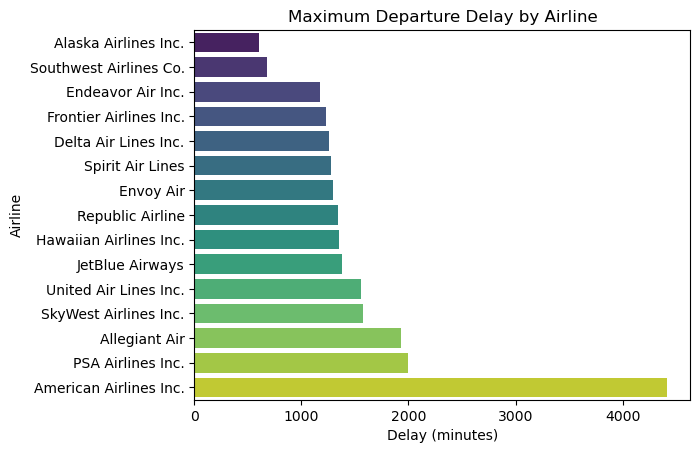

In [14]:
# Drop Airline Code information after colon for better viewing
df_max_delay['Airline'] = df_max_delay['Airline'].str.split(':').str[0]
# Create barplot of airline versus departure delay
sns.barplot(x="Max_Departure_Delay", y="Airline", data=df_max_delay, hue="Airline", palette="viridis", legend=False)
plt.title("Maximum Departure Delay by Airline")
plt.xlabel("Delay (minutes)")
plt.ylabel("Airline")
plt.show()

### Maximal Early Departures


- **Data:** Query #2 – maximal early departures per airline.
- **Visualization:** Horizontal bar chart showing airlines with largest early departures.
- **Insight:**
  - Identify airlines that depart significantly early (potentially causing passenger issues).
  - Compare early departures vs. delays.

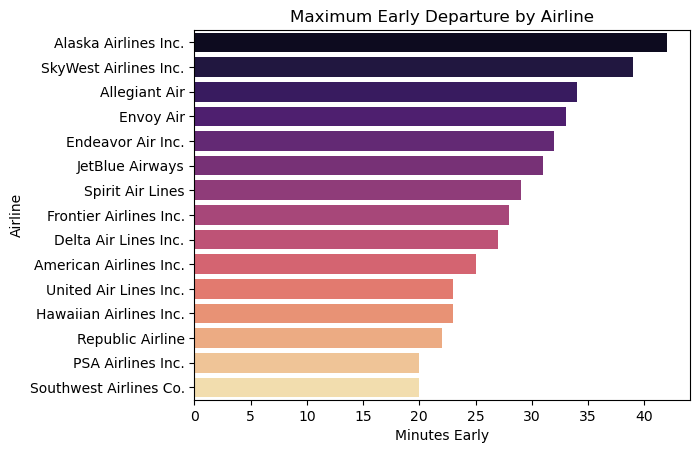

In [15]:
# Drop Airline Code information after colon for better viewing
df_early['Airline'] = df_early['Airline'].str.split(':').str[0]
# Create barplot of airline versus early departure
sns.barplot(x="Max_Early_Departure", y="Airline", data=df_early, hue="Airline", palette="magma", legend=False)
plt.title("Maximum Early Departure by Airline")
plt.xlabel("Minutes Early")
plt.ylabel("Airline")
plt.show()

## Busiest Days of the Week

- **Data:** Query #3 – flights per day of the week.
- **Visualization:**
  - Bar chart of total flights by day of the week.
  - Overlay rank labels for clarity.
- **Insight:**
  - Identify busiest days (e.g., Monday or Friday).
  - Discuss operational implications, staffing, and hub congestion.

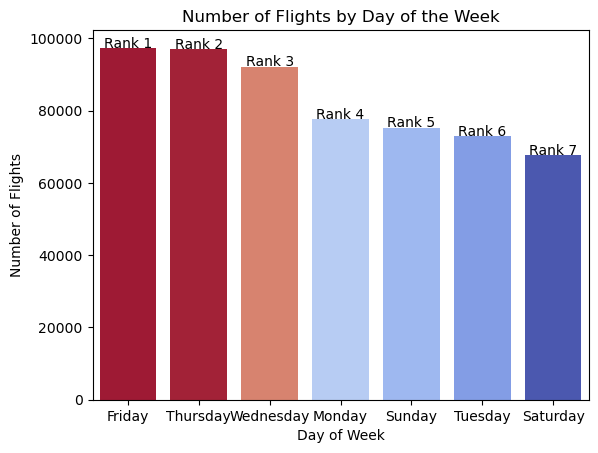

In [16]:
sns.barplot(x="Day", y="Num_Flights", data=df_days, hue="Num_Flights", palette="coolwarm", legend=False)
plt.title("Number of Flights by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Flights")
for i, row in df_days.iterrows():
    plt.text(i, row.Num_Flights + 100, f"Rank {row.Day_Rank}", ha='center')
plt.show()

### Worst Airport by Average Departure Delay

- **Data:** Query #4 – airport with highest average departure delay.
- **Visualization:** Highlight the airport in a single point chart or infographic.
- **Insight:**
  - Name the “worst-performing” airport.
  - Discuss possible causes: congestion, weather, operational factors.

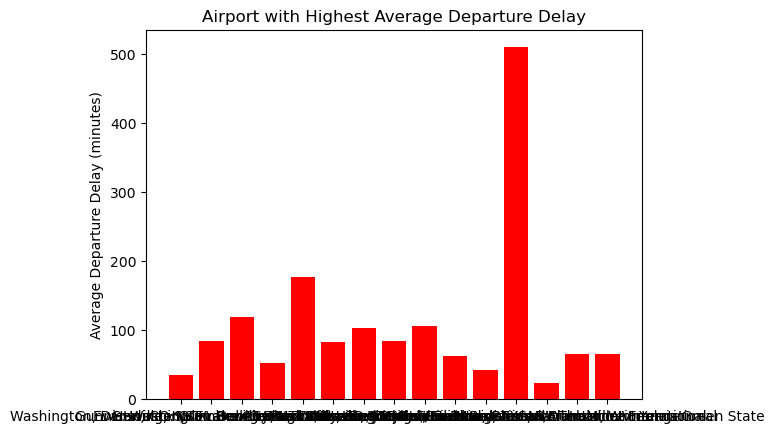

In [17]:
plt.bar(df_airport["Airport_Name"], df_airport["Highest_Avg_Delay"], color='red')
plt.title("Airport with Highest Average Departure Delay")
plt.ylabel("Average Departure Delay (minutes)")
plt.show()


### Worst Airport per Airline

- **Data:** Query #5 – airport with highest average delay for each airline.
- **Visualization:**
  - Heatmap or grouped bar chart: airlines vs. airport delays.
- **Insight:**
  - Highlight patterns: do certain airlines consistently have problematic airports?
  - Discuss operational decision-making (hub strategies, scheduling).





### Total Number of Cancellations

- **Data:** Query #6a.
- **Visualization:** Pie chart of canceled vs. completed flights.
- **Insight:**
  - Cancellation rate is low (<1% of flights) but significant for passengers.


In [18]:
df_cancel

,Airport_Name,Most_Frequent_Reason,Num_Cancelled
0,"Aberdeen, SD: Aberdeen Regional",Weather,2
1,"Akron, OH: Akron-Canton Regional",Weather,2
2,"Albany, GA: Southwest Georgia Regional",Weather,1
3,"Albany, NY: Albany International",Weather,37
4,"Albuquerque, NM: Albuquerque International Sun...",Weather,11
...,...,...,...
280,"Wilmington, NC: Wilmington International",Weather,3
281,"Worcester, MA: Worcester Regional",Weather,6
282,"Wrangell, AK: Wrangell Airport",Weather,3
283,"Yakutat, AK: Yakutat Airport",Weather,4


### Most Frequent Reason per Airport

- **Data:** Query #6b.
- **Visualization:**
  - Stacked bar chart: airports vs. cancellation reasons.
  - Top 10 airports by number of cancellations for clarity.
- **Insight:**
  - Weather vs. carrier vs. NAS vs. security.
  - Operational recommendations to reduce cancellations.

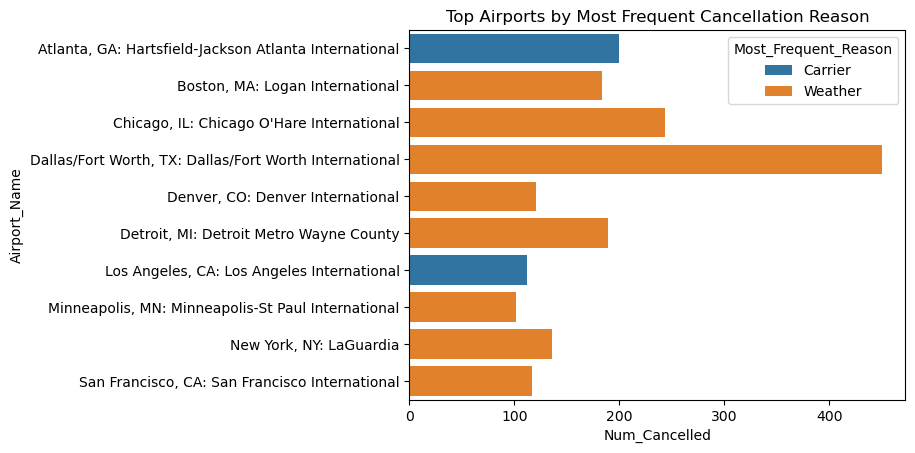

In [19]:
top_airports = df_cancel.groupby("Airport_Name")["Num_Cancelled"].sum().nlargest(10).index
df_top = df_cancel[df_cancel.Airport_Name.isin(top_airports)]
sns.barplot(x="Num_Cancelled", y="Airport_Name", hue="Most_Frequent_Reason", data=df_top)
plt.title("Top Airports by Most Frequent Cancellation Reason")
plt.show()

### Temporal Trends in Flight Volume**

- **Data:** Query #7 – 3-day rolling average of daily flights.
- **Visualization:**
  - Line chart: `Flights_Per_Day` vs. `Avg_Previous_3_Days`.
  - Highlight trends, peaks, and dips.
- **Insight:**
  - Detect periods of higher traffic.
  - Identify volatility and possible operational strain.

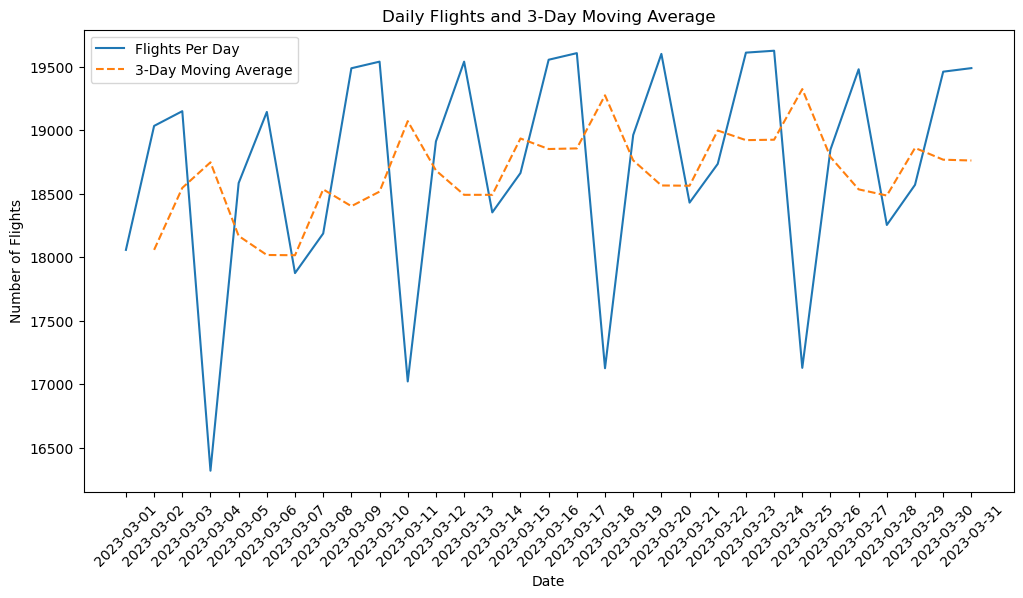

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df_trends["FlightDate"], df_trends["Flights_Per_Day"], label="Flights Per Day")
plt.plot(df_trends["FlightDate"], df_trends["Avg_Previous_3_Days"], label="3-Day Moving Average", linestyle='--')
plt.title("Daily Flights and 3-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.legend()
plt.xticks(rotation=45)
plt.show()